In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import locale
from custom.watermarks import add_watermark

# Set locale to "it" to parse the month correctly
locale.setlocale(locale.LC_ALL, "it_IT.UTF-8")
# plt.style.use('default')
plt.style.use('seaborn-dark')

# Importa dati dell'Istituto Superiore di Sanità
Questi dati sono ricavati dai bollettini settimanali dell'ISS. Vedi ad esempio https://www.epicentro.iss.it/coronavirus/bollettino/Bollettino-sorveglianza-integrata-COVID-19_15-settembre-2021.pdf

In [2]:
df_assoluti = pd.read_csv('../dati/dati_ISS_complessivi.csv', sep=';')

df_assoluti

,data,non vaccinati,vaccinati completo,casi non vaccinati,casi vaccinati,ospedalizzati non vaccinati,ospedalizzati vaccinati,terapia intensiva non vaccinati,terapia intensiva vaccinati,decessi non vaccinati,decessi vaccinati
0,2021-10-06,10942694,38641022,56808,36529,5224,2268,604,173,888,580
1,2021-09-29,11786620,37417795,70900,40060,6160,2418,717,174,927,565
2,2021-09-22,12581126,36332207,86133,44050,6782,2456,775,173,877,509
3,2021-09-15,13334156,35599815,96900,44990,6841,2331,786,163,770,405
4,2021-09-08,14507530,34292078,104890,43775,6579,2118,712,157,571,280
5,2021-09-01,15656647,32287644,107937,40380,5988,1788,641,127,383,187
6,2021-08-25,16708830,29628678,104405,33894,5162,1349,500,95,246,92
7,2021-08-18,17568325,26501452,95261,24978,4052,859,334,61,177,48
8,2021-08-11,20322716,22345659,80585,18887,3067,627,247,34,143,34
9,2021-08-04,21289761,19570464,60267,12333,2234,404,169,23,128,34


# Elaborazione dati
Calcola tassi di infezione, ospedalizzazione e decessi per vaccinati e non vaccinati

In [3]:
# ricava i tassi, dividendo per la popolazione vaccinati e non vaccinata
from custom.preprocessing_dataframe import compute_incidence

df_tassi = compute_incidence(df_assoluti)
df_tassi.index = pd.to_datetime(df_assoluti['data'], format='%Y/%m/%d')

Calcola i numeri assoluti (medi, giornalieri) dell'epidemia

In [4]:
df_assoluti2 = df_assoluti.copy(deep=True)
df_assoluti2.index = pd.to_datetime(df_assoluti2['data'], format='%Y/%m/%d')
df_assoluti2.drop('data', axis=1, inplace=True)
# trasforma in numeri settimanali
df_assoluti2 = (1/30)*df_assoluti2

# Rappresentazione grafica dei risultati

In [5]:
# funzioni per il plot

def which_axe(x):
    axes[x].set_xlabel('')
    axes[x].legend(['Non vaccinati', 'Vaccinati'])
    axes[x].grid()
    
# colori per plot vaccinati/non vaccinati
palette = ["tab:red", "tab:green"]

### Tassi di infezione, ricovero, decesso

watermark fontsize: 14, angle:-45.0


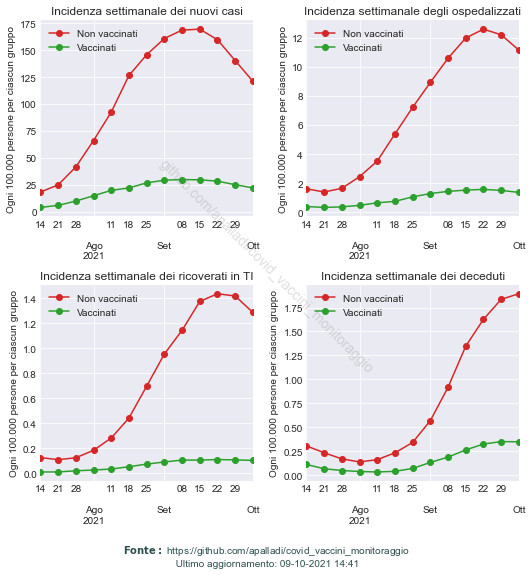

In [6]:
fig, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(7.5, 7.5))

# unpack all the axes subplots
axes = axes2.ravel()

df_tassi.iloc[:, [0, 1]].plot(ax=axes[0], marker='o', color=palette)
axes[0].set_title('Incidenza settimanale dei nuovi casi')
axes[0].set_ylabel('Ogni 100.000 persone per ciascun gruppo')
which_axe(0)

df_tassi.iloc[:, [2, 3]].plot(ax=axes[1], marker='o', color=palette)
axes[1].set_title('Incidenza settimanale degli ospedalizzati')
axes[1].set_ylabel('Ogni 100.000 persone per ciascun gruppo')
which_axe(1)

df_tassi.iloc[:, [4, 5]].plot(ax=axes[2], marker='o', color=palette)
axes[2].set_title('Incidenza settimanale dei ricoverati in TI')
axes[2].set_ylabel('Ogni 100.000 persone per ciascun gruppo')
which_axe(2)

df_tassi.iloc[:, [6, 7]].plot(ax=axes[3], marker='o', color=palette)
axes[3].set_title('Incidenza settimanale dei deceduti')
axes[3].set_ylabel('Ogni 100.000 persone per ciascun gruppo')
which_axe(3)

# add watermarks
ax = plt.gca()
add_watermark(fig, ax.xaxis.label.get_fontsize())

plt.tight_layout()
plt.savefig('../risultati/andamento_epidemia.png', dpi=300, bbox_inches="tight")
plt.show()

### Rapporto fra tassi

watermark fontsize: 10, angle:-39.81


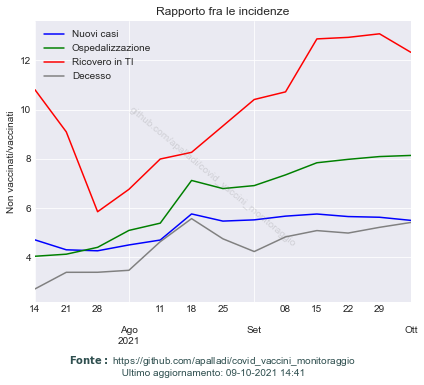

In [7]:
fig = plt.figure(figsize=(6, 5))
(df_tassi.iloc[:, 0]/df_tassi.iloc[:, 1]).plot(label='Nuovi casi', color='blue')
(df_tassi.iloc[:, 2]/df_tassi.iloc[:, 3]).plot(label='Ospedalizzazione', color='green')
(df_tassi.iloc[:, 4]/df_tassi.iloc[:, 5]).plot(label='Ricovero in TI', color='red')
(df_tassi.iloc[:, 6]/df_tassi.iloc[:, 7]).plot(label='Decesso', color='gray')
plt.title('Rapporto fra le incidenze')
plt.legend()
plt.xlabel('')
plt.ylabel('Non vaccinati/vaccinati')
plt.grid()

# add watermarks
ax = plt.gca()
add_watermark(fig, ax.xaxis.label.get_fontsize())

plt.tight_layout()
plt.savefig('../risultati/rapporto_tra_tassi.png', dpi=300, bbox_inches="tight")
plt.show()

### Andamento dei numeri assoluti

watermark fontsize: 14, angle:-45.0


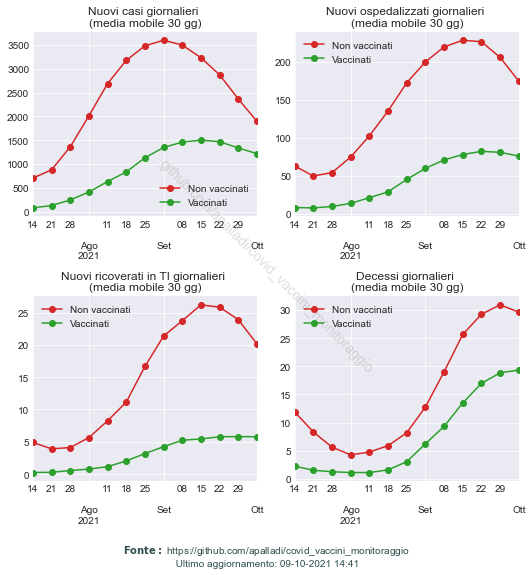

In [8]:
fig, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(7.5, 7.5))

# unpack all the axes subplots
axes = axes2.ravel()

df_assoluti2.iloc[:, [2, 3]].plot(ax=axes[0], marker='o', color=palette)
axes[0].set_title('Nuovi casi giornalieri \n(media mobile 30 gg)')
which_axe(0)

df_assoluti2.iloc[:, [4, 5]].plot(ax=axes[1], marker='o', color=palette)
axes[1].set_title('Nuovi ospedalizzati giornalieri \n(media mobile 30 gg)')
which_axe(1)

df_assoluti2.iloc[:, [6, 7]].plot(ax=axes[2], marker='o', color=palette)
axes[2].set_title('Nuovi ricoverati in TI giornalieri \n(media mobile 30 gg)')
which_axe(2)

df_assoluti2.iloc[:, [8, 9]].plot(ax=axes[3], marker='o', color=palette)
axes[3].set_title('Decessi giornalieri \n(media mobile 30 gg)')
which_axe(3)

# add watermarks
ax = plt.gca()
add_watermark(fig, ax.xaxis.label.get_fontsize())

plt.tight_layout()
plt.savefig('../risultati/andamento_epidemia_num_assoluti.png', dpi=300, bbox_inches="tight")
plt.show()